In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_DL/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
data_var= data.pivot_table(index="gill-size", columns="class", aggfunc="size")
data_var

class,0,1
gill-size,,
0,3920,1692
1,288,2224


<Axes: xlabel='class', ylabel='gill-size'>

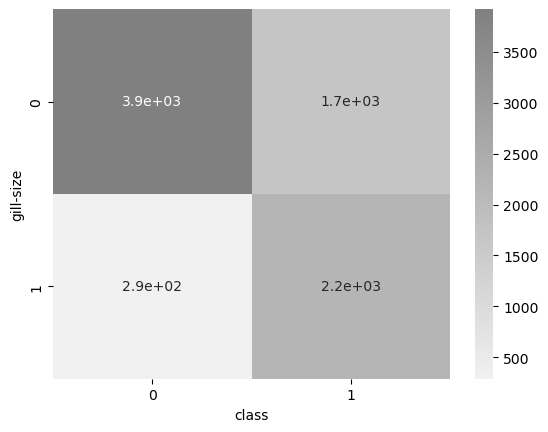

In [20]:
sns.heatmap(data_var, cmap=sns.light_palette("gray", as_cmap=True), annot=True)

In [18]:
X_data = data.drop(['class','gill-size'], axis = 1)
y_data = data['gill-size']

In [19]:
X_data = X_data.to_numpy()

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X_data, y_data, test_size = 0.2)

In [10]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2)

In [11]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (5199, 21)
y train : (5199,)
X test : (1625, 21)
y test : (1625,)
X val : (1300, 21)
y val : (1300,)


In [12]:
#Defining the model 
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import SGD, Adam

inputs = Input(shape = (21,))

x = Dense(32,activation='relu')(inputs)
x2 = Dense(32,activation='relu')(x)
x3 = Dense(32, activation = 'relu')(x2)
outputs = Dense(1)(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "rmsprop",
             loss = "mse",metrics=["mae"]
             )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [13]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 0.1503 - mae: 0.2570 - val_loss: 0.0483 - val_mae: 0.1691
Epoch 2/100
163/163 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1482 - val_loss: 0.0307 - val_mae: 0.1282
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0223 - mae: 0.1099 - val_loss: 0.0122 - val_mae: 0.0754
Epoch 4/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0860 - val_loss: 0.0086 - val_mae: 0.0630
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0750 - val_loss: 0.0122 - val_mae: 0.0820
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0651 - val_loss: 0.0056 - val_mae: 0.0501
Epoch 7/100
163/163 [==============================] - 0s 3ms/step - loss: 0.0068 - mae: 0.0587 - val_loss: 0.0079 - val_mae: 0.0645
Epoch 8/100
163/163 [==============================] - 0s 3ms/step - 

163/163 [==============================] - 0s 3ms/step - loss: 3.8724e-04 - mae: 0.0129 - val_loss: 2.2011e-04 - val_mae: 0.0097
Epoch 61/100
163/163 [==============================] - 0s 3ms/step - loss: 3.8739e-04 - mae: 0.0127 - val_loss: 4.3621e-04 - val_mae: 0.0120
Epoch 62/100
163/163 [==============================] - 0s 3ms/step - loss: 3.8385e-04 - mae: 0.0125 - val_loss: 7.0225e-04 - val_mae: 0.0177
Epoch 63/100
163/163 [==============================] - 0s 3ms/step - loss: 3.8963e-04 - mae: 0.0128 - val_loss: 8.1178e-04 - val_mae: 0.0194
Epoch 64/100
163/163 [==============================] - 0s 3ms/step - loss: 3.7423e-04 - mae: 0.0120 - val_loss: 1.5116e-04 - val_mae: 0.0064
Epoch 65/100
163/163 [==============================] - 0s 3ms/step - loss: 3.4747e-04 - mae: 0.0118 - val_loss: 6.4303e-04 - val_mae: 0.0198
Epoch 66/100
163/163 [==============================] - 0s 3ms/step - loss: 3.4744e-04 - mae: 0.0124 - val_loss: 4.4792e-04 - val_mae: 0.0157
Epoch 67/100
163/16

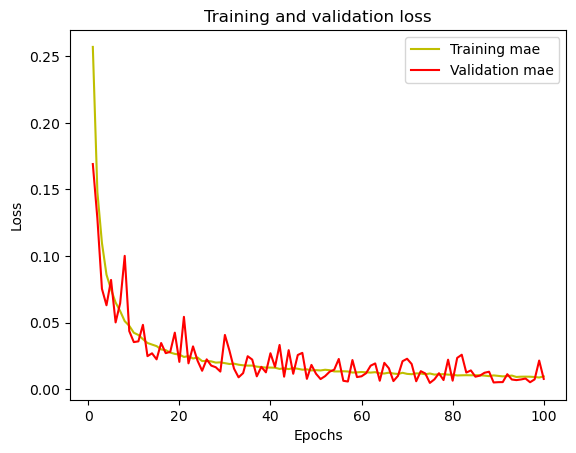

In [15]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training mae')
plt.plot(epochs, val_loss, 'r', label='Validation mae')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

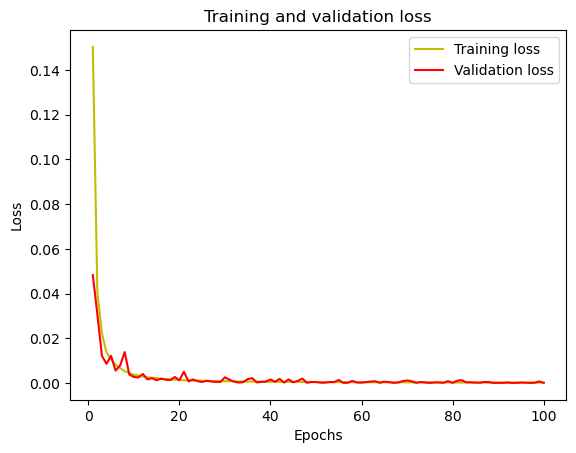

In [21]:
history_dict = history.history
mae = history_dict['mae']

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, 'y', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [22]:
results = model.evaluate(X_test, y_test)
results

51/51 [==============================] - 0s 2ms/step - loss: 1.1333e-04 - mae: 0.0079


[0.00011333006114000455, 0.007873971946537495]